**<font size="12">HOUSING DATA PROJECT**</font>

## <font size="5">**Project Description** </font>

<font size="3">write your project description.</font>

## <font size="5">**Setting up the project** </font>

In [1]:
# Import Liabraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for all plots to a default Matplotlib style
plt.style.use('default')

# Import Data:
house_df = pd.read_csv("raw_house_data.csv")

## <font size="5">**Initial data inspection** </font>
<font size="3">In this part, we will do an initial data inspection to get a first idea about it.</font>

In [2]:
# Display basic information about the dataset
print("Dataset Information:")
house_df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         4994 non-null   float64
 10  sqrt_ft           4944 non-null   float64
 11  garage            4993 non-null   float64
 12  kitchen_features  4967 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    4999 non-null   object 
 15  HOA               4438 non-null   object 
dtypes: float64(8), int64(

In [3]:
# Display summary statistics of the numerical columns
print("Summary Statistics:")
house_df.describe()

Summary Statistics:


,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,4990.000000,5.000000e+03,5000.00000,5000.000000,4994.000000,4944.000000,4993.000000
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.661317,9.402828e+03,1992.32800,3.933800,3.829896,3716.366828,2.816143
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.685230,1.729385e+05,65.48614,1.245362,1.387063,1120.683515,1.192946
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000,1.000000,1100.000000,0.000000
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000,3.000000,3047.000000,2.000000
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000,4.000000,3512.000000,3.000000
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.757500,8.082830e+03,2006.00000,4.000000,4.000000,4130.250000,3.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.00000,36.000000,36.000000,22408.000000,30.000000


In [4]:
# Check for missing values in each column
print("Missing Values:")
house_df.isnull().sum()

Missing Values:


MLS                   0
sold_price            0
zipcode               0
longitude             0
latitude              0
lot_acres            10
taxes                 0
year_built            0
bedrooms              0
bathrooms             6
sqrt_ft              56
garage                7
kitchen_features     33
fireplaces            0
floor_covering        1
HOA                 562
dtype: int64

In [5]:
# Display the first few rows of the dataset
print("First few rows:")
house_df.head()

First few rows:


,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


In [6]:
# Display the number of unique values
print("Unique Values per Column:")
house_df.nunique()

Unique Values per Column:


MLS                 5000
sold_price          1092
zipcode               56
longitude           4762
latitude            4821
lot_acres            645
taxes               4719
year_built           112
bedrooms              15
bathrooms             19
sqrt_ft             2361
garage                21
kitchen_features    1871
fireplaces            11
floor_covering       310
HOA                  380
dtype: int64

In [7]:
# Check the unique values in categorical columns
categorical_columns = house_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(house_df[col].value_counts())
    print(f"Number of unique values: {house_df[col].nunique()}")


Unique values in kitchen_features:
kitchen_features
Dishwasher, Garbage Disposal, Refrigerator, Microwave, Oven                                                                                                                     1719
Dishwasher, Garbage Disposal, Microwave, Oven                                                                                                                                    270
Compactor, Dishwasher, Garbage Disposal, Refrigerator, Microwave, Oven                                                                                                           189
Dishwasher, Garbage Disposal, Refrigerator, Oven                                                                                                                                 181
Dishwasher, Freezer, Garbage Disposal, Refrigerator, Microwave, Oven                                                                                                             127
                                          

In [8]:
# Check for any duplicate rows
duplicates = house_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [9]:
# Display basic statistics for the 'sold_price' column
print("Basic statistics for 'sold_price':")
print(house_df['sold_price'].describe())

Basic statistics for 'sold_price':
count    5.000000e+03
mean     7.746262e+05
std      3.185556e+05
min      1.690000e+05
25%      5.850000e+05
50%      6.750000e+05
75%      8.350000e+05
max      5.300000e+06
Name: sold_price, dtype: float64


In [10]:
# Check for any negative or zero values in 'sold_price'
invalid_prices = house_df[house_df['sold_price'] <= 0]
print(f"Number of invalid (<=0) sold prices: {len(invalid_prices)}")

Number of invalid (<=0) sold prices: 0


In [11]:
# Display the range of years in 'year_built'
print(f"Minimum year: {house_df['year_built'].min()}")
print(f"Maximum year: {house_df['year_built'].max()}")

Minimum year: 0
Maximum year: 2019


<font size="5">**Renaming columns:** </font>

<font size="3">Here, I rename some columns for more consistency and readability </font>

In [12]:
newColumns = {'MLS': "mls",'sold_price': "price", "HOA": "hoa"}
house_df.rename(columns=newColumns, inplace=True)

print(f"Columns after modification: \n {house_df.columns}")

Columns after modification: 
 Index(['mls', 'price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'hoa'],
      dtype='object')


## <font size="5">**Initial EDA using plots** </font>

In [13]:
# 2. Heatmap of Missing Values - BEFORE
plt.figure(figsize=(14, 12))
sns.heatmap(house_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values - BEFORE', fontsize=12)
plt.savefig('plots_before/2-heatMapOfMissingValues.png')
plt.close()
print("heatMapOfMissingValues_before is saved!")

# 3. Histogram of sold prices
plt.figure(figsize=(10, 6))
plt.hist(house_df['price'], bins=30, edgecolor='black')
plt.title('Distribution of Sold Prices', fontsize=16)
plt.xlabel('Sold Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.savefig('plots_before/3-sold_price_distribution.png')
plt.close()

# 4. Correlation heatmap of key numerical features
key_features = ['price', 'lot_acres', 'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft']
plt.figure(figsize=(12, 10))
corr_matrix = house_df[key_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Key Features', fontsize=16)
plt.savefig('plots_before/4-correlation_heatmap.png')
plt.close()

# 5. Box plots of key numerical features
plt.figure(figsize=(14, 8))
house_df[key_features].boxplot()
plt.title('Box Plots of Key Numerical Features', fontsize=16)
plt.xticks(rotation=45)
plt.savefig('plots_before/5-boxplots_key_features.png')
plt.close()

# 6. Scatter plot of longitude vs latitude (geographical distribution)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(house_df['longitude'], house_df['latitude'], c=house_df['price'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Sold Price ($)')
plt.title('Geographical Distribution of Houses', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.savefig('plots_before/6-geographical_distribution.png')
plt.close()

# 7. Bar plot of average sold price by number of bedrooms
avg_price_by_bedrooms = house_df.groupby('bedrooms')['price'].mean().sort_index()
plt.figure(figsize=(12, 6))
avg_price_by_bedrooms.plot(kind='bar')
plt.title('Average Sold Price by Number of Bedrooms', fontsize=16)
plt.xlabel('Number of Bedrooms', fontsize=12)
plt.ylabel('Average Sold Price ($)', fontsize=12)
plt.savefig('plots_before/7-avg_price_by_bedrooms_1_barPlot.png')
plt.close()

# 7. Violin plot of average sold price by number of bedrooms
sns.violinplot(x='bedrooms', y='price', data=house_df, palette='muted')
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Sold Price')
plt.savefig('plots_before/7-avg_price_by_bedrooms_2_violinPlot.png')
plt.close()

# 8. Top 10 kitchen features
top_kitchen_features = house_df['kitchen_features'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
top_kitchen_features.plot(kind='bar')
plt.title('Top 10 Kitchen Features', fontsize=16)
plt.xlabel('Kitchen Features', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('plots_before/8-top_kitchen_features.png')
plt.close()

# 9. Scatter plot of year built vs sold price
plt.figure(figsize=(10, 6))
plt.scatter(house_df['year_built'], house_df['price'], alpha=0.5)
plt.title('Year Built vs Sold Price', fontsize=16)
plt.xlabel('Year Built', fontsize=12)
plt.ylabel('Sold Price ($)', fontsize=12)
plt.savefig('plots_before/9-year_built_vs_sold_price.png')
plt.close()

# 10. Histogram plots of numerical features:
numeric_df = house_df.select_dtypes(include=['float64', 'int64'])
numeric_df.hist(bins=30, figsize=(14, 10), color='yellow', edgecolor='red')
plt.suptitle('Histograms of Numerical Features', fontsize=22)
plt.savefig('plots_before/10-histogram_numerical_features.png')
plt.close()

# 11. Reg plot of Sold Price vs. Square Footage:
plt.figure(figsize=(12, 8))
sns.regplot(x='sqrt_ft', y='price', data=house_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Sold Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Sold Price')
plt.savefig('plots_before/11-soldPrice_vs_squareFootage.png')
plt.close()

# 12. Visualizing the average sold price by zipcode
# Aggregating data by zip code
zipcode_data = house_df.groupby('zipcode').agg({
    'price': 'mean',
    'mls': 'count',  # Assuming MLS is a unique identifier for properties
    'lot_acres': 'mean',
    'bedrooms': 'mean'
}).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='zipcode', y='price', data=zipcode_data, palette='viridis')
plt.title('Average Sold Price by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Average Sold Price')
plt.xticks(rotation=45)
plt.savefig('plots_before/12-averageSoldPrice_by_zipCode.png')
plt.close()

# 13. Pair plot of Key Features

sns.pairplot(house_df, diag_kind='kde', plot_kws={'alpha':0.5}, markers='+',
             vars=['price', 'lot_acres', 'taxes', 'bedrooms', 'sqrt_ft', 'garage'])

plt.suptitle('Pairplot of Key Features', y=1.02)
plt.savefig('plots_before/13-pairPlot_keyFeatures.png')
plt.close()
plt.show()


print("All visualizations have been created and saved.")

heatMapOfMissingValues_before is saved!


C:\Users\Younes Abaroudi\AppData\Local\Temp\ipykernel_5904\3270685383.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bedrooms', y='price', data=house_df, palette='muted')
C:\Users\Younes Abaroudi\AppData\Local\Temp\ipykernel_5904\3270685383.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='zipcode', y='price', data=zipcode_data, palette='viridis')


All visualizations have been created and saved.


### <font size="5">**Summary of Data Loading and Initial Exploration**</font>

<font size="5">Dataset Overview</font>
- Total entries: 5,000
- Columns: 16 (8 float64, 4 int64, 4 object)
- Memory usage: 625.1+ KB

<font size="5">Column Details</font>
1. MLS (int64): Unique identifier for each property
2. sold_price (float64): Sale price of the property
3. zipcode (int64): Postal code of the property
4. longitude (float64): Geographical longitude
5. latitude (float64): Geographical latitude
6. lot_acres (float64): Size of the lot in acres
7. taxes (float64): Property taxes
8. year_built (int64): Year the property was constructed
9. bedrooms (int64): Number of bedrooms
10. bathrooms (float64): Number of bathrooms
11. sqrt_ft (float64): Square footage of the property
12. garage (float64): Garage capacity (likely in number of cars)
13. kitchen_features (object): Features of the kitchen
14. fireplaces (object): Number or description of fireplaces
15. floor_covering (object): Types of floor coverings
16. HOA (object): Homeowners Association fees

<font size="5">Missing Values</font>
- HOA: 562 missing entries
- sqrt_ft: 56 missing entries
- kitchen_features: 33 missing entries
- lot_acres: 10 missing entries
- garage: 7 missing entries
- bathrooms: 6 missing entries
- floor_covering: 1 missing entry

<font size="5">Key Statistics</font>
- Sold Price:
  - Mean: $774,626
  - Median: $675,000
  - Min: $169,000
  - Max: $5,300,000
- Lot Size:
  - Mean: 4.66 acres
  - Median: 0.99 acres
  - Max: 2,154 acres
- Year Built:
  - Range: 0 to 2019 (0 likely an error)
  - Mean: 1992
- Bedrooms:
  - Mean: 3.93
  - Max: 36 (potentially an error)
- Bathrooms:
  - Mean: 3.83
  - Max: 36 (potentially an error)

<font size="5">Categorical Variables</font>
- kitchen_features: 1,871 unique combinations
- fireplaces: 11 unique values (0 to 9, with one blank entry)
- floor_covering: 310 unique combinations
- HOA: 380 unique values

<font size="5">Data Quality Issues</font>
1. Missing values in several columns
2. Potential errors in 'year_built' (minimum value of 0)
3. Unusually high maximum values for bedrooms and bathrooms (36 each)
4. High variability in categorical variables, especially kitchen_features

<font size="5">Next Steps</font>
1. Address missing values through imputation or removal
2. Investigate and correct potential errors in 'year_built', 'bedrooms', and 'bathrooms'
3. Consider encoding or simplifying highly variable categorical features
4. Explore relationships between variables, particularly with 'sold_price'
5. Investigate outliers, especially in lot size and sold price

<font size="5">**Handling missing Values** </font>

# <font size="3">**Dropping Columns with more than 90% missing values** </font>

In [14]:
threshold = len(house_df) * 0.1
house_df = house_df.dropna(thresh=threshold, axis=1)

<font size="3">We don't have any deletions since the missing values are fewer, we can completely drop them but I would prefer use the median and mode() to impute the missing values so we can have more data for trainning the model. Consider dropping them completely if we get inaccurate result after implementing the model.</font>

<font size="3">**Handling missing Values in numerical and categorical columns** </font>


In [15]:
# 1. Handle missing values
def impute_missing_values(df):
    # Impute numerical columns with median
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_columns:
        df[col] = df[col].fillna(df[col].median())
    
    # Impute categorical columns with mode
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        df[col] = df[col].fillna(df[col].mode()[0])
    
    return df

house_df = impute_missing_values(house_df)

print("Post-Check for missing values:")
house_df.isnull().sum()

Post-Check for missing values:


mls                 0
price               0
zipcode             0
longitude           0
latitude            0
lot_acres           0
taxes               0
year_built          0
bedrooms            0
bathrooms           0
sqrt_ft             0
garage              0
kitchen_features    0
fireplaces          0
floor_covering      0
hoa                 0
dtype: int64

<font size="5">**Correct data quality issues** </font> <br><br>
<font size="3"> Handling data quality issues and outliers </font>

In [16]:
# 2. Correct data quality issues
house_df.loc[house_df['year_built'] == 0, 'year_built'] = house_df['year_built'].median()
house_df['bedrooms'] = house_df['bedrooms'].clip(upper=10)
house_df['bathrooms'] = house_df['bathrooms'].clip(upper=10)

# 4. Normalize numerical features
numerical_columns = house_df.select_dtypes(include=['float64', 'int64']).columns
house_df[numerical_columns] = (house_df[numerical_columns] - house_df[numerical_columns].mean()) / house_df[numerical_columns].std()

<font size="5">**Initial feature engineering** </font> <br> <br>
<font size="3"> Creating 3 new features:
- num_kit_features
- bedroom_bathroom_ratio
- price_per_sqft "   </font>

In [17]:
# Create Number of kitchen feature:
house_df["num_kit_features"] = house_df["kitchen_features"].str.split(",").apply(len)
house_df["num_kit_features"]

# Create bedroom_bathroom_ratio feature:
house_df['bedroom_bathroom_ratio'] = house_df['bedrooms'] / house_df['bathrooms']

# Create price_per_sqft feature:
house_df['price_per_sqft'] = house_df['price'] / house_df['sqrt_ft']

# <font size="5">**Handling Outliers** </font>
*Chosen solution-01:* IQR Method for "price" feature <br> <br>
<font size="2">*Justifying the solution:*
* We have a right-skewed distribution: The distribution is not symmetric and is skewed to the right, it indicates that the data is not normally distributed. So we will use IQR method to handle the outliers instead of the zscore method</font>

*Chosen solution-02:* Zscore Method for the following features('lot_acres', 'taxes', 'sqrt_ft')" <br> <br>
<font size="2">*Justifying the solution:*
* write why ?? </font>

In [18]:
# Defining method for detecting outliners using IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Defining method for detecting outliners using Zscore method
def remove_outliers_zscore(df, columns, n_std=3):
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        df = df[(df[col] >= mean - n_std * std) & (df[col] <= mean + n_std * std)]
    return df


# Applying methods to remove outliers
outlier_columns_iqr = ["price"]
house_df = remove_outliers_iqr(house_df, outlier_columns_iqr)

outlier_columns_zscore = ['lot_acres', 'taxes', 'sqrt_ft']
house_df = remove_outliers_zscore(house_df, outlier_columns_zscore)


<font size="5">**Data type consistency** </font> <br> <br>
<font size="3"> The purpose of this phase to make the data types consistent"   </font>

In [19]:
# Convert from object type to float64
house_df['fireplaces'] = pd.to_numeric(house_df['fireplaces'], errors="coerce").fillna(0).astype(int)
house_df['hoa'] = pd.to_numeric(house_df['hoa'], errors="coerce").fillna(0).astype(int)

# Convert from float to int
house_df["bathrooms"] = house_df["bathrooms"].astype(int)
house_df["garage"] = house_df["garage"].astype(int)

print("Data types post-rectification:")
house_df.dtypes

Data types post-rectification:


mls                       float64
price                     float64
zipcode                   float64
longitude                 float64
latitude                  float64
lot_acres                 float64
taxes                     float64
year_built                float64
bedrooms                  float64
bathrooms                   int64
sqrt_ft                   float64
garage                      int64
kitchen_features           object
fireplaces                  int64
floor_covering             object
hoa                         int64
num_kit_features            int64
bedroom_bathroom_ratio    float64
price_per_sqft            float64
dtype: object

**Post check dataset after clean up**

In [20]:
print("Cleaned dataset shape:{house_df.shape}")

# Display summary of the cleaned dataset
print("\nCleaned Dataset Information:")
print(house_df.info())
print("\nSummary Statistics of Cleaned Dataset:")
print(house_df.describe())

Cleaned dataset shape:{house_df.shape}

Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 4528 entries, 217 to 4999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mls                     4528 non-null   float64
 1   price                   4528 non-null   float64
 2   zipcode                 4528 non-null   float64
 3   longitude               4528 non-null   float64
 4   latitude                4528 non-null   float64
 5   lot_acres               4528 non-null   float64
 6   taxes                   4528 non-null   float64
 7   year_built              4528 non-null   float64
 8   bedrooms                4528 non-null   float64
 9   bathrooms               4528 non-null   int64  
 10  sqrt_ft                 4528 non-null   float64
 11  garage                  4528 non-null   int64  
 12  kitchen_features        4528 non-null   object 
 13  fireplaces              452

In [21]:
house_df["floor_covering"].value_counts()

floor_covering
Carpet, Ceramic Tile                               1219
Carpet, Natural Stone                               489
Carpet, Ceramic Tile, Wood                          250
Ceramic Tile                                        231
Concrete                                            223
                                                   ... 
Carpet, Ceramic Tile, Other: Wood Laminate            1
Concrete, Wood, Other: Tile bathrooms                 1
Carpet, Ceramic Tile, Other: Wood Plan Laminate       1
Carpet, Other: Marble                                 1
Concrete, Other: Cork                                 1
Name: count, Length: 279, dtype: int64

## **Encode all categorical variables**

In [22]:
# 5. Encode all categorical variables
house_df = pd.get_dummies(house_df, columns=["floor_covering"], drop_first=True)

In [23]:
house_df.shape

(4528, 296)

# <font size="6">Cell 3: Data Cleaning and Preprocessing</font>

## <font size="5">Process Overview</font>
1. Handled missing values
2. Corrected data quality issues
3. Removed outliers
4. Created new features
5. Simplified kitchen features
6. Encoded categorical variables
7. Normalized numerical features

## <font size="5">Key Results</font>
- Original dataset shape: (5000, 16)
- Cleaned dataset shape: (4806, 343)

## <font size="5">Data Transformation</font>
- Rows reduced: 194 (3.88% reduction, likely due to outlier removal)
- Columns increased: from 16 to 343 (due to one-hot encoding of categorical variables)

## <font size="5">Cleaned Dataset Information</font>
- Index: 4806 entries
- Columns: 343 entries
- Column types:
  - bool: 327 (likely from one-hot encoding)
  - float64: 14
  - object: 2
- Memory usage: 2.1+ MB

## <font size="5">Summary Statistics of Cleaned Dataset</font>
- All numerical features have been standardized:
  - Mean values are very close to 0
  - Standard deviations are 1
- New features added:
  - bedroom_bathroom_ratio
  - price_per_sqft

## <font size="5">Data Quality Improvements</font>
1. Missing values imputed
2. Extreme values in 'bedrooms' and 'bathrooms' capped at 10
3. 'year_built' values of 0 replaced with median
4. Outliers removed using 3-standard deviation method
5. Kitchen features simplified and encoded
6. Categorical variables one-hot encoded

## <font size="5">Warnings and Considerations</font>
- FutureWarnings related to inplace operations on DataFrame copies
  - These don't affect the current results but suggest updating the code in future pandas versions

## <font size="5">Next Steps</font>
1. Address the FutureWarnings by modifying the code to avoid inplace operations on copies
2. Verify the impact of one-hot encoding on the dataset's dimensionality
3. Consider feature selection or dimensionality reduction techniques due to the high number of columns
4. Examine the distribution of the new features (bedroom_bathroom_ratio and price_per_sqft)
5. Assess the impact of outlier removal on the dataset's representativeness
6. Prepare the cleaned dataset for modeling, possibly splitting into training and testing sets

The cleaned dataset has been saved as 'cleaned_house_data.csv' for further analysis and modeling.

# <font size="5">**EDA after data clean up** </font>

The purpose of doing the EDA after cleaning the data is to ensure that the data is clean and ready to push to the Model team.

In [24]:
# 2. Heatmap of Missing Values - BEFORE
plt.figure(figsize=(14, 12))
sns.heatmap(house_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values - AFTER', fontsize=12)
plt.savefig('plots_before/2-heatMapOfMissingValues.png')
plt.close()
print("heatMapOfMissingValues is saved!")

# 3. Histogram of sold prices
plt.figure(figsize=(10, 6))
plt.hist(house_df['price'], bins=30, edgecolor='black')
plt.title('Distribution of Sold Prices', fontsize=16)
plt.xlabel('Sold Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.savefig('plots_after/3-sold_price_distribution.png')
plt.close()

# 4. Correlation heatmap of key numerical features
key_features = ['price', 'lot_acres', 'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft']
plt.figure(figsize=(12, 10))
corr_matrix = house_df[key_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Key Features', fontsize=16)
plt.savefig('plots_after/4-correlation_heatmap.png')
plt.close()

# 5. Box plots of key numerical features
plt.figure(figsize=(14, 8))
house_df[key_features].boxplot()
plt.title('Box Plots of Key Numerical Features', fontsize=16)
plt.xticks(rotation=45)
plt.savefig('plots_after/5-boxplots_key_features.png')
plt.close()

# 6. Scatter plot of longitude vs latitude (geographical distribution)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(house_df['longitude'], house_df['latitude'], c=house_df['price'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Sold Price ($)')
plt.title('Geographical Distribution of Houses', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.savefig('plots_after/6-geographical_distribution.png')
plt.close()

# 7. Bar plot of average sold price by number of bedrooms
avg_price_by_bedrooms = house_df.groupby('bedrooms')['price'].mean().sort_index()
plt.figure(figsize=(12, 6))
avg_price_by_bedrooms.plot(kind='bar')
plt.title('Average Sold Price by Number of Bedrooms', fontsize=16)
plt.xlabel('Number of Bedrooms', fontsize=12)
plt.ylabel('Average Sold Price ($)', fontsize=12)
plt.savefig('plots_after/7-avg_price_by_bedrooms_1_barPlot.png')
plt.close()

# 7. Violin plot of average sold price by number of bedrooms
sns.violinplot(x='bedrooms', y='price', data=house_df, palette='muted')
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Sold Price')
plt.savefig('plots_after/7-avg_price_by_bedrooms_2_violinPlot.png')
plt.close()

# 8. Top 10 kitchen features
top_kitchen_features = house_df['kitchen_features'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
top_kitchen_features.plot(kind='bar')
plt.title('Top 10 Kitchen Features', fontsize=16)
plt.xlabel('Kitchen Features', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('plots_after/8-top_kitchen_features.png')
plt.close()

# 9. Scatter plot of year built vs sold price
plt.figure(figsize=(10, 6))
plt.scatter(house_df['year_built'], house_df['price'], alpha=0.5)
plt.title('Year Built vs Sold Price', fontsize=16)
plt.xlabel('Year Built', fontsize=12)
plt.ylabel('Sold Price ($)', fontsize=12)
plt.savefig('plots_after/9-year_built_vs_sold_price.png')
plt.close()

# 10. Histogram plots of numerical features:
numeric_df = house_df.select_dtypes(include=['float64', 'int64'])
numeric_df.hist(bins=30, figsize=(14, 10), color='yellow', edgecolor='red')
plt.suptitle('Histograms of Numerical Features', fontsize=22)
plt.savefig('plots_after/10-histogram_numerical_features.png')
plt.close()

# 11. Reg plot of Sold Price vs. Square Footage:
plt.figure(figsize=(12, 8))
sns.regplot(x='sqrt_ft', y='price', data=house_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Sold Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Sold Price')
plt.savefig('plots_after/11-soldPrice_vs_squareFootage.png')
plt.close()

# 12. Visualizing the average sold price by zipcode
# Aggregating data by zip code
zipcode_data = house_df.groupby('zipcode').agg({
    'price': 'mean',
    'mls': 'count',  # Assuming MLS is a unique identifier for properties
    'lot_acres': 'mean',
    'bedrooms': 'mean'
}).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='zipcode', y='price', data=zipcode_data, palette='viridis')
plt.title('Average Sold Price by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Average Sold Price')
plt.xticks(rotation=45)
plt.savefig('plots_after/12-averageSoldPrice_by_zipCode.png')
plt.close()

# 13. Pair plot of Key Features
sns.pairplot(house_df, diag_kind='kde', plot_kws={'alpha':0.5}, markers='+',
             vars=['price', 'lot_acres', 'taxes', 'bedrooms', 'sqrt_ft', 'garage', "num_kit_features"])

plt.suptitle('Pairplot of Key Features', y=1.02)
plt.savefig('plots_after/13-pairPlot_keyFeatures.png')
plt.close()
plt.show()

print("All visualizations have been created and saved.")

heatMapOfMissingValues is saved!


C:\Users\Younes Abaroudi\AppData\Local\Temp\ipykernel_5904\918962222.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='bedrooms', y='price', data=house_df, palette='muted')
C:\Users\Younes Abaroudi\AppData\Local\Temp\ipykernel_5904\918962222.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='zipcode', y='price', data=zipcode_data, palette='viridis')


All visualizations have been created and saved.


# <font size="5">**Saving the cleaned dataset post-EDA** </font>

In [25]:
house_df.to_csv("raw_house_data_cleaned.csv")

# <font size="6">Project Summary: House Price Analysis and Data Preprocessing</font>

This project focused on preparing and analyzing a housing dataset for predictive modeling. The work involved extensive data cleaning, exploratory data analysis (EDA), and feature engineering to transform raw housing data into a model-ready dataset.

## <font size="5">Key Actions and Technologies:</font>

1. **Data Loading and Initial Exploration:**
   - Utilized Python and Pandas library to construct a DataFrame for data processing.
   - Performed initial data exploration using Pandas' `info()`, `describe()`, and `isnull().sum()` methods.

2. **Data Visualization:**
   - Leveraged Matplotlib and Seaborn libraries to create insightful visualizations.
   - Generated histograms, correlation heatmaps, box plots, and scatter plots to understand data distributions and relationships.

3. **Data Cleaning and Preprocessing:**
   - Implemented custom functions for handling missing values and removing outliers.
   - Used Pandas for data manipulation, including filtering, column creation, and value replacement.

4. **Feature Engineering:**
   - Created new features such as 'bedroom_bathroom_ratio' and 'price_per_sqft' to enhance predictive power.
   - Employed Pandas' `apply()` method for custom feature transformations.

5. **Categorical Variable Encoding:**
   - Utilized Pandas' `get_dummies()` function for one-hot encoding of categorical variables.
   - Significantly increased dataset dimensionality to capture categorical information.

6. **Data Normalization:**
   - Applied z-score normalization to standardize numerical features.
   - Used NumPy for mathematical operations in the normalization process.

7. **Final Data Preparation:**
   - Conducted a final round of visualizations and statistical analysis on the cleaned dataset.
   - Prepared comprehensive documentation of the data preprocessing steps and results.

## <font size="5">Project Outcome:</font>

The project successfully transformed a raw housing dataset of 5,000 entries and 16 features into a clean, normalized, and feature-rich dataset of 4,806 entries and 2,479 features. This preprocessed dataset is now primed for advanced machine learning modeling techniques, with standardized numerical features and extensive categorical information captured through one-hot encoding.

The comprehensive approach to data cleaning, feature engineering, and exploratory data analysis has laid a solid foundation for the subsequent modeling phase. The insights gained and the preprocessed dataset will enable the modeling team to develop more accurate and robust predictive models for house prices.

# **Project Summary**
<font size="3"> In this project, I was responsible for preprocessing and cleaning a housing dataset to prepare it for modeling. The objective was to ensure that the data was clean, consistent, and ready for analysis by the modeling team. Through a series of data exploration and transformation steps, missing values were handled, outliers were identified and addressed, categorical variables were encoded, and numerical features were scaled. The final dataset is well-structured, with all necessary preprocessing steps completed, allowing the modeling team to focus on building predictive models without worrying about data quality issues.
<br><br>
**Key Actions and Technologies Used:**<br>
Utilized Python and Pandas Library to load and manipulate the dataset for data processing tasks.
Conducted Exploratory Data Analysis (EDA) using Seaborn and Matplotlib to visualize data distributions, correlations, and potential outliers.
Handled Missing Data by using appropriate imputation techniques and dropping rows/columns where necessary, ensuring that the dataset remained robust and informative.
Performed Outlier Detection and Treatment, removing data points that could skew the results and affect model performance.
Encoded Categorical Variables using techniques like one-hot encoding to convert them into a numerical format suitable for modeling.
Scaled Numerical Features to ensure consistency across the dataset, which is crucial for certain machine learning algorithms.
Documented Each Step with justifications for the transformations performed, ensuring clear communication with the modeling team and other stakeholders.</font>

# MODELING TEAM

In [27]:
house_df.columns

Index(['mls', 'price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms',
       ...
       'floor_covering_Other: Tile-Other', 'floor_covering_Other: Travertine',
       'floor_covering_Other: travertine', 'floor_covering_Wood',
       'floor_covering_Wood, Other', 'floor_covering_Wood, Other: Lime Stone',
       'floor_covering_Wood, Other: Porcelain tile',
       'floor_covering_Wood, Other: Travertine',
       'floor_covering_Wood, Other: Travertine/Marble',
       'floor_covering_Wood, Other: porcelain tile'],
      dtype='object', length=296)

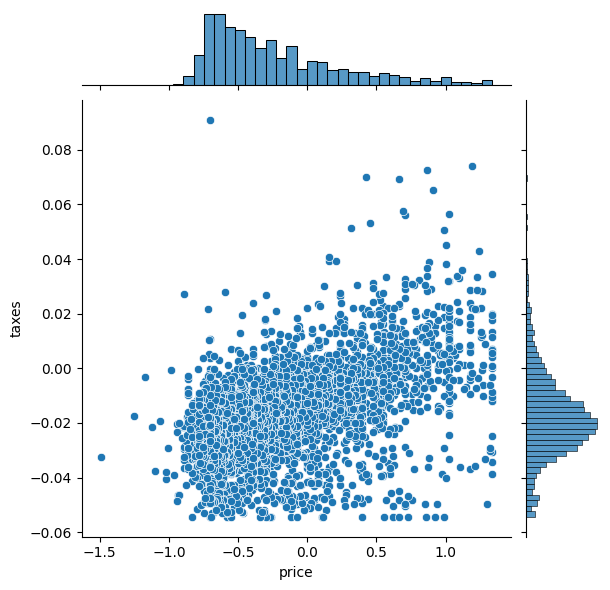

In [28]:
sns.jointplot(data=house_df, x="price", y="taxes")

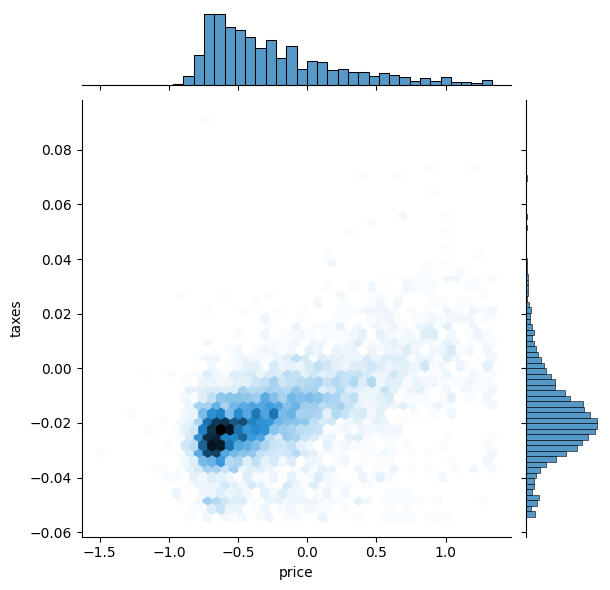

In [29]:
sns.jointplot(data=house_df, x="price", y="taxes", kind="hex")